# Исследование закономерностей определяющих успешность игры

Мы работаем в интернет-магазине, который продаёт компьютерные игры по всему миру. Из открытых источников нам доступны данные (до 2016 года) о продажах игр, оценки пользователей и экспертов, жанры и платформы. Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт в 2017 году и спланировать рекламные кампании.
<br>
<br>
Анализ выполнен в несколько этапов:
<br>
1. Подготовка данных
<br>
2. Исследовательский анализ данных
<br>
3. Портрет пользователя каждого региона
<br>
4. Проверка гипотез
<br>
5. Общий вывод


## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

In [2]:
data = pd.read_csv('/Users/paulaschultz/Desktop/Yandex.Practicum Portfolio/games.csv')
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.duplicated().sum()

0

При первом знакомстве с данными обнаружены пропуски: в случае с незначительным количеством (например, 2 в столбце Name) - их можно удалить, в случае с большим количеством пропущенных значений в Critic_Score и User_Score мы оставим данные без изменений. Мы также переименуем названия столбцов, и переведем некоторые столбцы в другие типы. Для дальнейшего анализа нам потребуется столбец с расчетом суммарных продаж - добавим и его.
<br>
Также в столбце User_Score нам встретилось значение 'tbd' - 'to be determined', а это предполагает, что пользователям только предстоит оценить игру, и, по сути, это тот же NaN, им и заменим.


## Предобработка данных

Приведем названия столбцов к нижнему регистру:

In [4]:
data_columns = ['name', 'platform', 'year_of_release', 'genre', 'NA_sales', 'EU_sales', 'JP_sales', 'other_sales', 'critic_score', 'user_score', 'rating']
data.columns = data_columns
data.head(5)

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Удалим 2 строки, где нам неизвестно название игры:

In [5]:
data.dropna(subset=['name'], inplace=True)
data.reset_index(inplace=True,drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   NA_sales         16713 non-null  float64
 5   EU_sales         16713 non-null  float64
 6   JP_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Преобразуем тип данных:

In [6]:
data['user_score'] = data['user_score'].replace("tbd", np.NaN)

data['user_score'] = data['user_score'].astype('float64')

#data['year_of_release'] = data['year_of_release'].astype('Int64')

data['critic_score'] = data['critic_score'].astype('float64')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   NA_sales         16713 non-null  float64
 5   EU_sales         16713 non-null  float64
 6   JP_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Добавим столбец с суммарными продажами:

In [7]:
data['total_sales'] = data[['NA_sales','EU_sales','JP_sales', 'other_sales']].sum(axis = 1)
data.head(3)

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52


In [8]:
data.dropna(subset=['year_of_release'], inplace=True)
data.reset_index(inplace=True,drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   NA_sales         16444 non-null  float64
 5   EU_sales         16444 non-null  float64
 6   JP_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


Сделаем "заглушку" для пропусков в столбце rating, т.к. рейтинг ESRB (Entertainment Software Rating Board — ассоциация, определяющая возрастной рейтинг компьютерных игр), который используется в наших данных, действует, в основном, в США и Канаде, а в Японии и Европе рейтинг назначают организации CERO и PEGI соответственно.

In [9]:
data['rating'] = data['rating'].fillna('W')
data['rating'].isna().sum()

0

## Исследовательский анализ данных

### Продажи по годам

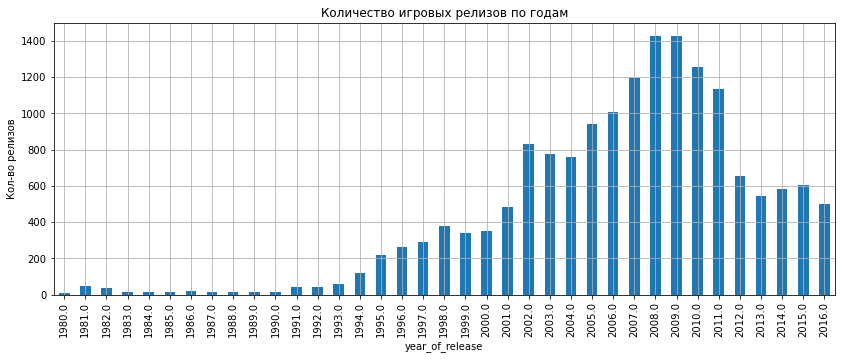

In [10]:
release_year = data.groupby('year_of_release')['name'].count()
release_year.columns = ['year_of_release', 'game_count']

release_year.plot(x='year_of_release', y='game_count', kind='bar', figsize=(14, 5), grid=True)

plt.ylabel("Кол-во релизов")
plt.title('Количество игровых релизов по годам')

plt.show()

На графике мы можем увидеть, что игровая индустрия переживала несколько периодов расцвета:
<br>
- в 1994 году суммарные релизы достигли отметки в примерно 100 игр и продолжили расти; 
- в 2002 году происходит слудующий резкий скачок в индустрии и количество реализуемых игр перешагивает через 800 игр в год;
- следующий пик в релизах мы наблюдаем в 2008-2009 годах, когда количество игр достигает отметки 1400.

### Продажи по платформам

Определим топ платформ с лучшими показателями продаж:

In [11]:
best_data = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
best_data.head(6)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
Name: total_sales, dtype: float64

In [12]:
# Создадим список с лучшими платформами:
best_platforms = ('PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS')

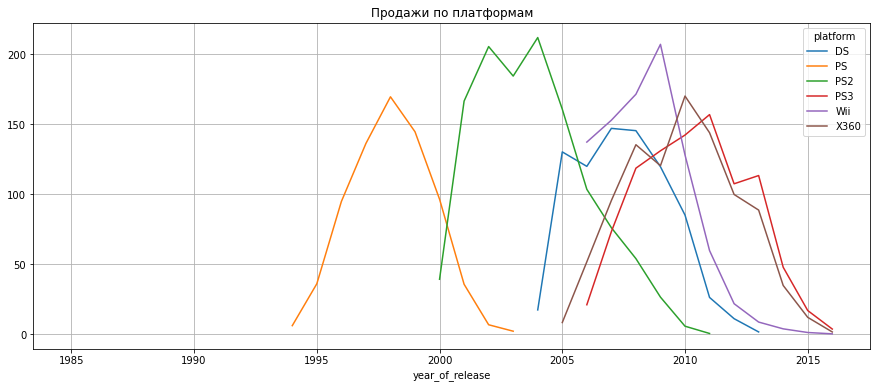

In [13]:
data[data['platform'].isin(best_platforms)].groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack('platform').plot(figsize=(15,6), grid=True)

plt.title('Продажи по платформам')
plt.show()

Очевидно, что средний "жизненный цикл" платформы составляет, в среднем, 10 лет. Также платформы оставляют за собой небольшой "хвостик" в жизненном цикле следующей платформы, который составляет, в среднем, 3 года. 

### Продажи за актуальный период

Для прогноза на 2017 год, актуальным периодом будем считать три года 2014-2016 гг., т.к. в предыдущих пунктах мы установили периоды роста игровых релизов и срок появления и исчезновения новых платформ. Также учитываем тот факт, что разработка игр - динамично развивающаяся сфера, а на разработку игр даже в крупных студиях уходит от 3 лет (https://en.wikipedia.org/wiki/Video_game_development#:~:text=Most%20modern%20PC%20or%20console,platform%20and%20number%20of%20assets).

In [14]:
good_data = data.query('year_of_release >= 2014')

### Лидеры продаж

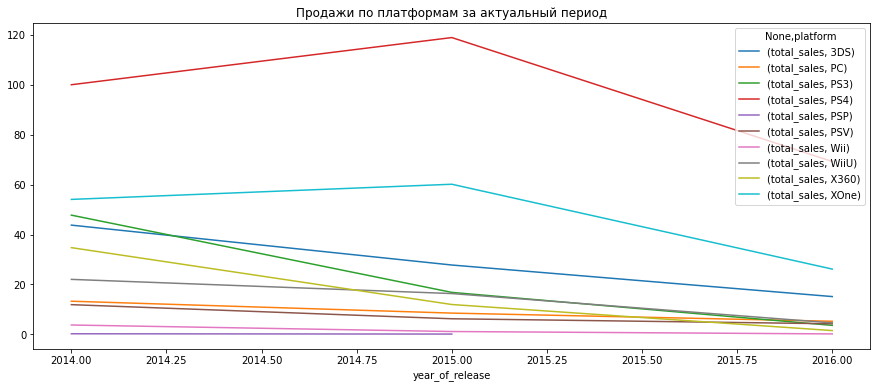

In [15]:
good_data.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum').unstack('platform').plot(figsize=(15, 6))

plt.title('Продажи по платформам за актуальный период')

plt.show()

В отобранный нами период самыми прибыльными платформами являются PlayStation 4, Xbox One и Nintendo 3DS. При этом с 2015 года наблюдается падение продаж у всех трех компаний. У остальных платформ продажи находятся на довольно низком уровне и в них также наблюдается отрицательная динамика.

### Глобальные продажи по платформам

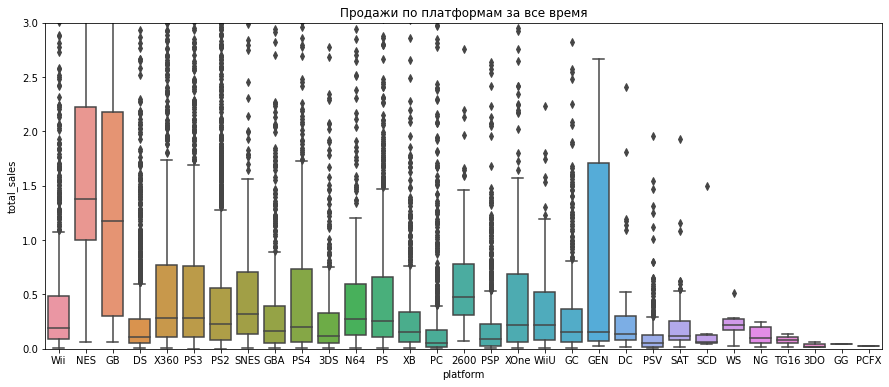

In [16]:
# Диаграмма размаха с данными за весь период анализа:
plt.figure(figsize=(15,6))
sns.boxplot(data=data, y='total_sales', x='platform').set(ylim=(0, 3))

plt.title('Продажи по платформам за все время')

plt.show()

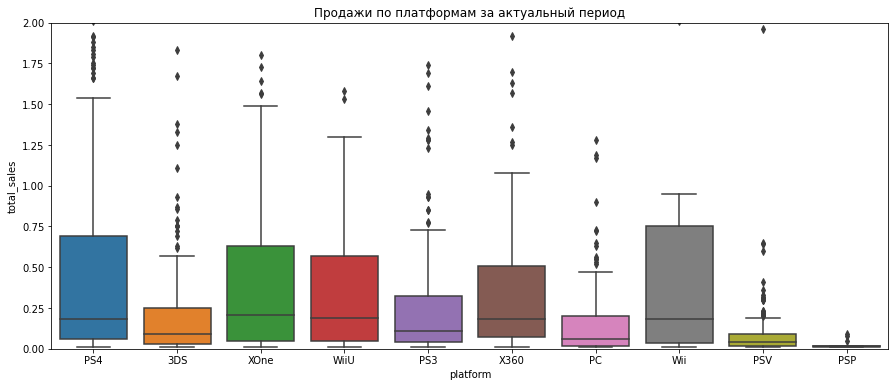

In [17]:
# За актуальный период:

plt.figure(figsize=(15,6))
sns.boxplot(data=good_data, y='total_sales', x='platform').set(ylim=(0, 2))

plt.title('Продажи по платформам за актуальный период')

plt.show()

В продажах по миру за все время лидируют японские Nintendo и Game Boy. 
<br>
В продажах за актуальный период лидируют платформы PlayStation 4,  Xbox One, Nintendo Wii U, Xbox 360 и Nintendo Wii - у них самые большие медианные значения и "усы".

### Влияние отзывов на продажи

Выявим корреляцию между отзывами и продажами на примере самых популярных платформ за последние 3 года в рамках нашего анализа:

In [18]:
# PlayStation 4:

ps4_corr = good_data.query('platform == "PS4"')[['total_sales', 'critic_score', 'user_score']].dropna().reset_index(drop=True)

ps4_corr.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.401903,-0.043186
critic_score,0.401903,1.000000,0.546434
user_score,-0.043186,0.546434,1.000000


Text(0.5, 1.0, 'Зависимость продаж от отзывов пользователей PS4')

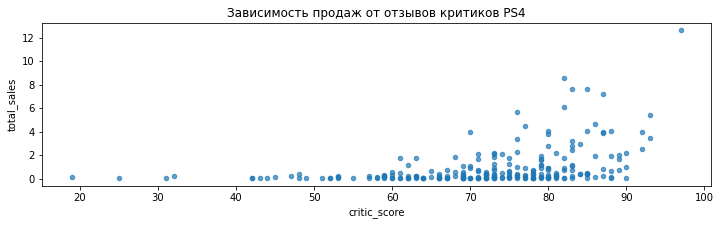

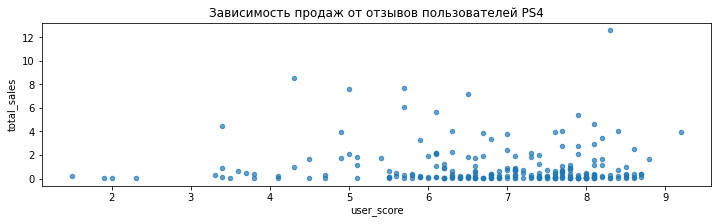

In [19]:
ps4_corr.plot(x='critic_score',y='total_sales',kind='scatter',figsize=(12,3), alpha=0.7)
plt.title('Зависимость продаж от отзывов критиков PS4')

ps4_corr.plot(x='user_score',y='total_sales',kind='scatter',figsize=(12,3), alpha=0.7)
plt.title('Зависимость продаж от отзывов пользователей PS4')

В то время как отзывы критиков действительно влияют на продажи игр (коэффициент корреляции Пирсона составляет 0.4), отзывы пользователей ни играют никакой роли в продажах (коэффициент -0.04).

In [20]:
# Xbox One:

xone_corr = good_data.query('platform == "XOne"')[['total_sales', 'critic_score', 'user_score']].dropna().reset_index(drop=True)

xone_corr.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.422112,-0.091734
critic_score,0.422112,1.000000,0.440977
user_score,-0.091734,0.440977,1.000000


Text(0.5, 1.0, 'Зависимость продаж от отзывов пользователей XOne')

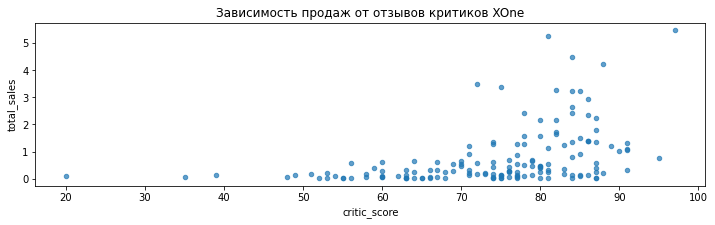

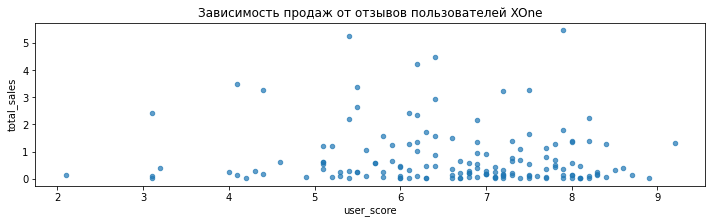

In [21]:
xone_corr.plot(x='critic_score',y='total_sales',kind='scatter',figsize=(12,3), alpha=0.7)
plt.title('Зависимость продаж от отзывов критиков XOne')

xone_corr.plot(x='user_score',y='total_sales',kind='scatter',figsize=(12,3), alpha=0.7)
plt.title('Зависимость продаж от отзывов пользователей XOne')

У платформы Xbox One практически идентичная ситуация: отзывы критиков и самих игроков не равнозначны, и не в пользу самих пользователей.

In [22]:
# Nintendo Wii U:

wiiu_corr = good_data.query('platform == "WiiU"')[['total_sales', 'critic_score', 'user_score']].dropna().reset_index(drop=True)

wiiu_corr.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.375640,0.411451
critic_score,0.375640,1.000000,0.763536
user_score,0.411451,0.763536,1.000000


Text(0.5, 1.0, 'Зависимость продаж от отзывов пользователей WiiU')

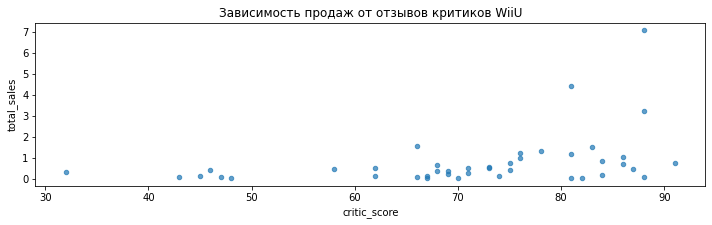

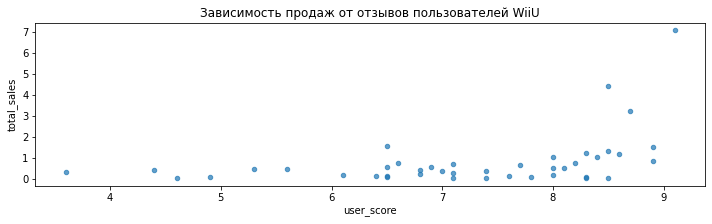

In [23]:
wiiu_corr.plot(x='critic_score',y='total_sales',kind='scatter',figsize=(12,3), alpha=0.7)
plt.title('Зависимость продаж от отзывов критиков WiiU')

wiiu_corr.plot(x='user_score',y='total_sales',kind='scatter',figsize=(12,3), alpha=0.7)
plt.title('Зависимость продаж от отзывов пользователей WiiU')

А вот у платформы Nintendo Wii U картина уже другая: здесь отзывы игроков начинают влиять на продажи, и даже больше чем критиков. Возможно, это связано с тем, что большое кол-во игроков Nintendo находятся в Японии, а этот рынок имеет свои особенности и отличия от американского и европейского.

In [24]:
# Xbox 360:

x360_corr = good_data.query('platform == "X360"')[['total_sales', 'critic_score', 'user_score']].dropna().reset_index(drop=True)

x360_corr.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.525723,0.336514
critic_score,0.525723,1.000000,0.625309
user_score,0.336514,0.625309,1.000000


Text(0.5, 1.0, 'Зависимость продаж от отзывов пользователей X360')

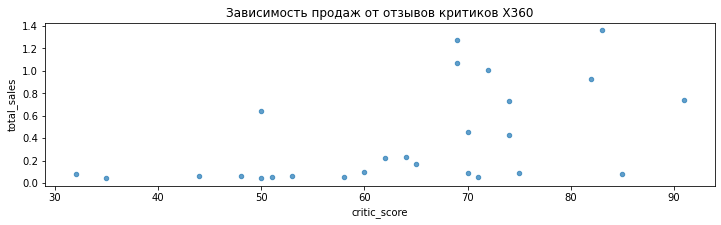

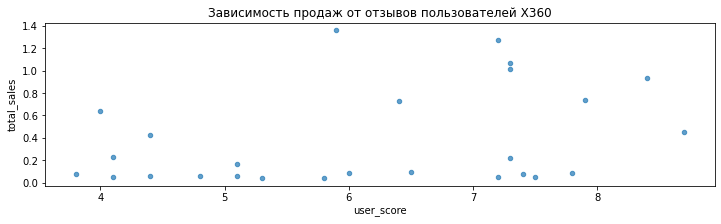

In [25]:
x360_corr.plot(x='critic_score',y='total_sales',kind='scatter',figsize=(12, 3), alpha=0.7)
plt.title('Зависимость продаж от отзывов критиков X360')

x360_corr.plot(x='user_score',y='total_sales',kind='scatter',figsize=(12, 3), alpha=0.7)
plt.title('Зависимость продаж от отзывов пользователей X360')

Тенденции PlayStation 4 сохраняются и в картине по Xbox 360: отзывы критиков влияют на продажи в большей степени чем отзывы игроков.

In [26]:
# Nintendo DS:

ds_corr = good_data.query('platform == "3DS"')[['total_sales', 'critic_score', 'user_score']].dropna().reset_index(drop=True)

ds_corr.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.284686,0.279850
critic_score,0.284686,1.000000,0.862485
user_score,0.279850,0.862485,1.000000


Text(0.5, 1.0, 'Зависимость продаж от отзывов пользователей 3DS')

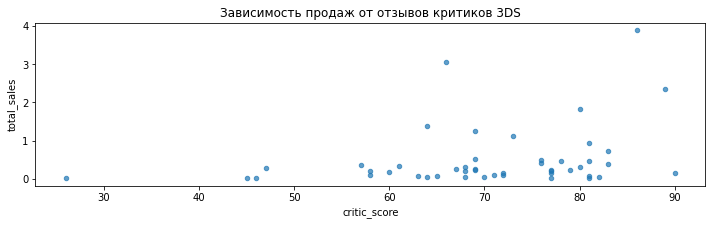

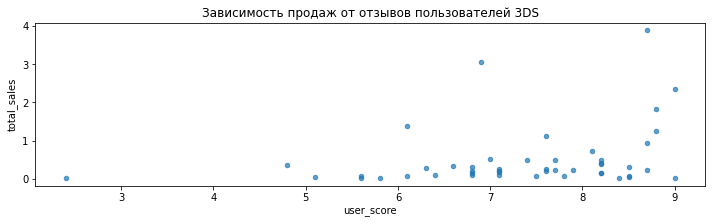

In [27]:
ds_corr.plot(x='critic_score',y='total_sales',kind='scatter',figsize=(12,3), alpha=0.7)
plt.title('Зависимость продаж от отзывов критиков 3DS')

ds_corr.plot(x='user_score',y='total_sales',kind='scatter',figsize=(12,3), alpha=0.7)
plt.title('Зависимость продаж от отзывов пользователей 3DS')

В случае с платофрмой Nintendo DS выводы отличаются: отзывы критиков и игроков равнозначны.

### Жанры игр

Посмотрим на какие жанры разработчики делали ставки больше всего:

In [28]:
genres = good_data.groupby('genre')['name'].count().sort_values(ascending=False)
genres.head(5)

genre
Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Name: name, dtype: int64

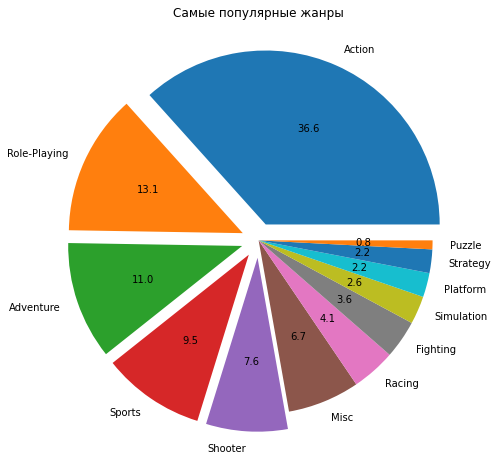

In [29]:
myexplode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.]
plt.figure(figsize=(20,8))
plt.pie(labels=genres.index, x=genres, explode=myexplode, autopct="%.1f")

plt.title('Самые популярные жанры')

plt.show()

По диаграмме распределения можно выделить 5 жанров, вмещающих в себя большинство игр: Action, Role-Playng, Adventure, Sports, Role-Shooter. Двумя самыми малочисленными жанрами стали стратегии и пазлы.

А теперь узнаем какой жанр игр пользовался наибольшей популярностью у пользователей и принес рвзработчикам больше всего продаж:

In [30]:
genre_sales = good_data.groupby('genre')['total_sales'].agg(['sum', 'median']).sort_values(by='median', ascending=False)
genre_sales.head(5)

,sum,median
genre,,
Shooter,170.94,0.515
Sports,109.48,0.180
Platform,18.09,0.140
Fighting,28.22,0.125
Role-Playing,101.44,0.110


In [31]:
plt.figure(figsize=(15, 6))

sns.boxplot(data=good_data, y=y, x='genre').set(ylim=(0, 2.5))

plt.title('Продажи по жанрам')

plt.show()

NameError: name 'y' is not defined

<Figure size 1080x432 with 0 Axes>

Лидером рынка становятся жанр Shooter, или "стрелялка".

## Портрет пользователя каждого региона

### Северная Америка

In [ ]:
NA_sales_platform = good_data.groupby('platform')['NA_sales'].sum().sort_values(ascending=False)
NA_sales_genre = good_data.groupby('genre')['NA_sales'].sum().sort_values(ascending=False)
NA_sales_rating = good_data.groupby('rating')['NA_sales'].sum().sort_values(ascending=False)

plt.figure(0)
plt.figure(figsize=(8,8))
plt.pie(labels=NA_sales_platform.index, x=NA_sales_platform, autopct="%.1f")
plt.title('Платформы NA')

plt.figure(1)
plt.figure(figsize=(8,8))
plt.pie(labels=NA_sales_genre.index, x=NA_sales_genre, autopct="%.1f")
plt.title('Жанры NA')

plt.figure(2)
plt.figure(figsize=(8,8))
plt.pie(labels=NA_sales_rating.index, x=NA_sales_rating, autopct="%.1f")
plt.title('Рейтинг NA')

plt.show()

По платформам в Северной Америке лидируют PlayStation 4,  Xbox One, Xbox 360, Nintendo 3DS и PlayStation 3. По жанрам игр картина не отличается от общей по миру: в лидерах все те же Shooter, Action, Sports и Role-Playing. Популярнее всего в странах Северной Америки игры с рейтингом «М» («Mature»). 
<br>
Необходимо отметить, что более 20% информации по рейтингу отмечено как "W", а это наша "заглушка" для пропущенных значений, хотя рейтинг ESRB как раз используется для стран Северной Америки, поэтому из всего этого можно сделать вывод, что данные по рейтингу были собраны плохо, и в других странах количество пропусков, возможно, будет только увеличиваться, т.к. там существуют свои рейтинги.

### Европа

In [ ]:
EU_sales_platform = good_data.groupby('platform')['EU_sales'].sum().sort_values(ascending=False)
EU_sales_genre = good_data.groupby('genre')['EU_sales'].sum().sort_values(ascending=False)
EU_sales_rating = good_data.groupby('rating')['EU_sales'].sum().sort_values(ascending=False)

plt.figure(0)
plt.figure(figsize=(8,8))
plt.pie(labels=EU_sales_platform.index, x=EU_sales_platform, autopct="%.1f")
plt.title('Платформы EU')

plt.figure(1)
plt.figure(figsize=(8,8))
plt.pie(labels=EU_sales_genre.index, x=EU_sales_genre, autopct="%.1f")
plt.title('Жанры EU')

plt.figure(2)
plt.figure(figsize=(8,8))
plt.pie(labels=EU_sales_rating.index, x=EU_sales_rating, autopct="%.1f")
plt.title('Рейтинг EU')

plt.show()

Европейский рынок не сильно отличается от западного: в Европе лидируют  платформы PlayStation 4, Xbox One, PlayStation 3, PlayStation и Nintendo 3DS. По жанрам игр и рейтингу картина также остается неизменной. 

### Япония

In [ ]:
JP_sales_platform = good_data.groupby('platform')['JP_sales'].sum().sort_values(ascending=False)
JP_sales_genre = good_data.groupby('genre')['JP_sales'].sum().sort_values(ascending=False)
JP_sales_rating = good_data.groupby('rating')['JP_sales'].sum().sort_values(ascending=False)

plt.figure(0)
plt.figure(figsize=(8,8))
plt.pie(labels=JP_sales_platform.index, x=JP_sales_platform, autopct="%.1f")
plt.title('Платформы JP')

plt.figure(1)
plt.figure(figsize=(8,8))
plt.pie(labels=JP_sales_genre.index, x=JP_sales_genre, autopct="%.1f")
plt.title('Жанры JP')

plt.figure(2)
plt.figure(figsize=(8,8))
plt.pie(labels=JP_sales_rating.index, x=JP_sales_rating, autopct="%.1f")
plt.title('Рейтинг JP')

plt.show()

А вот картина по Японии уже существенно отличается от мировой: здесь со значительным перевесом лидирует платофрма Nintendo 3DS (японская компания), а уже за ней платформы семейства  PlayStation. По игровым жанрам в лидеры вырывается RPG. 
<br>
Т.к. рейтинг ESRB не предназначен для Японии, самый популярный рейтинг в Японии из имеющихся данных - «T» («Teen»), затем «E» («Everyone»), и «М» («Mature»), но нам не следует полностью полагаться на этот вывод, ведь более 60% "местных" данных по рейтингу не были собраны.

## Проверка гипотез

### Пользовательские рейтинги платформ Xbox One и PC 

Выдвенем нулевую и альтернативную гипотезы для первого утверждения «Средние пользовательские рейтинги платформ Xbox One и PC одинаковые»:
<br>
H0 - «Средние рейтинги платформ Xbox One и PC одинаковые»
<br>
H1 - «Средние рейтинги платформ Xbox One и PC различаются»
<br>
Наши две генеральные совокупности по двум платформам никак не зависят друг от друга, поэтому выбираем метод ttest_ind.

In [ ]:
# Избавимся от пропусков перед проведением теста:
data_xone = good_data[good_data['platform']=="XOne"]['user_score'].dropna() 
data_pc = good_data[good_data['platform']=="PC"]['user_score'].dropna()

# Узнаем размеры совокупностей:
print(good_data.query('platform == "XOne"')['user_score'].count())
print(good_data.query('platform == "PC"')['user_score'].count())


И так как данные не сильно различаются по размеру, устанавливаем параметр equal_var = True.

In [ ]:
alpha = 0.05

results = st.ttest_ind(
    data_xone, 
    data_pc, equal_var = True)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


###  Пользовательские рейтинги жанров Action и Sports

Выдвенем нулевую и альтернативную гипотезы для второго утверждения «Средние пользовательские рейтинги жанров Action и Sports разные»:
<br>
H0 - «Средние  рейтинги жанров Action и Sports одинаковы»
<br>
H1 - «Средние  рейтинги жанров Action и Sports разные»
<br>
Наши две генеральные совокупности по двум платформам никак не зависят друг от друга, поэтому выбираем метод ttest_ind.

In [ ]:
# Избавимся от пропусков перед проведением теста:
data_action = good_data[good_data['genre']=="Action"]['user_score'].dropna() 
data_sports = good_data[good_data['genre']=="Sports"]['user_score'].dropna()

# Узнаем размеры совокупностей:
print(good_data.query('genre == "Action"')['user_score'].count())
print(good_data.query('genre == "Sports"')['user_score'].count())


Данные сильно различаются по размеру, устанавливаем параметр equal_var = False.

In [ ]:
alpha = 0.05

results = st.ttest_ind(
    data_action, 
    data_sports, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


## Общий вывод

Анализ данных о продаже игр мы начали с предобработки: переименовали столбцы, изменили тип некоторых данных, удалили несколько строк с пропусками, добавили дополнительный столбец с расчетами. На их основе был произведен сравнительный анализ показателей.
<br>
Мы пришли к следующим выводам:
   - проанализировав периоды роста игровых релизов и срок появления и исчезновения новых платформ, мы пришли к заключению, что актуальный период для анализа игрового рынка на 2017 год - 3 года (2014, 2015, 2016);
   - самыми прибыльными платформами являются PlayStation 4, Xbox One и Nintendo 3DS. При этом с 2015 года наблюдается падение продаж у всех трех компаний;
   - в то время как отзывы критиков имеют влияние на игровые продажи, отзывы самих игроков практически не влияют на коммерческий успех релиза;
   - жанр Shooter является наиболее прибыльным;
   - мы также составили портреты пользователей трех регионов продаж: Северной Америки, Европы и Японии. Игроки из Японии сильно отличаются от остальных регоионов в своих предподчетиниях по всем параметрам, в то время как покупатели из Северной Америки и Европы практически идентичны.
   
<br>
Нами также было проверено 2 утверждения: «Средние рейтинги платформ Xbox One и PC одинаковые» и «Средние  рейтинги жанров Action и Sports одинаковые». Первое утверждение можно считать верными, второе  - не подтвердилось.
<br>
<br>
Итогом нашего исследования стало понимание, что в 2017 году к коммерческому успеху приведут продажи платформ PlayStation 4 и Xbox One. Маркетологам стоит сконцентрироваться на беспроигрышных "стрелялках", либо, если компания готова рискнуть, на  "платформерых" или спортивных симуляторах с рейтингом "M". Внимание стоит обратить на отзывы экспертов; отзывы пользователей не критичны для продаж.  Для японского рынка картина чуть другая: лидером по платформам останется Nintendo 3DS, и наиболее прибыльными станет жанр Role-Playing. Здесть поработать придется и с отзывами игроков, и критиков.
